# 머신러닝 알고리즘 분류
* 회귀 분석(지도학습)
    * Linear Regression

* 분류 분석(지도학습)
    * Logistic Regression
    * K-Nearest Neighbor
    * Decision Tree
    * Random Forest
    * Naive Bayes Classifier
    * SVM

* 군집분석(clustering)(비지도 학습)
    * K-Means Clustering
    * Hierarchical Clustering
    * Density Clustering

## 알고리즘 설명
* 선형회귀모델은 2차원 상의 일직선이므로 다음과 같은 다항함수로 표현할 수 있다.
####  y = wx + b

* 모델에 특정한 값을 입력했을 때 얻어지는 결과를 y^ 라고한다. y^는 모델이 만들어낸 예측값이다.
#### y^ = y

### Linear Regression 종류
* 단순 선형 회귀
    * 단순 선형 회귀는 독립변수가 1개인 선형 회귀를 말한다. y = wx + b

* 다중 선형 회귀
    * feature가 2개 이상인 선형 회귀를 말한다. y = w1x1 + w2x2 + ... +b

### Cost function
* 실제값 y와 예측값 y^의 차이를 오차(error)라고 한다.
* 기계학습은 실제값과 예측값의 오차(error)를 최소화하는 w와 b를 찾아가는 과정이다.
* w, b와 오차의 관계를 함수로 나타낸 것을 비용함수(cost function) 또는 손실함수(Loss function)이라고 부른다.

### 평균제곱오차(MSE, Mean Squared Errors)
* 오차를 전체적으로 줄여야 예측의 정확도가 높아진다.
* MSE = n/1 * sigma(n)(i = 1) (yi = y^i)

### Optimizer
* 비용함수를 최소화하는 w와 b를 구하는 최적화 알고리즘을 옵티마이저라 부른다.
    * 경사하강법(Gradient Descent)
        * 가장 기본적인 옵티마이저이다.
        * 비용함수의 기울기가 작아지는 방향으로 w와 b를 업데이트 한다.
        * 비용함수를 그래프로 그리면 x ** 2 그래프가 된다.
    

In [7]:
#경사하강법
import numpy as np

x_data = np.array([1,2,3,4,5]).reshape(5,1) #5행 1열 2차원 데이터로 변환
t_data = np.array([2,3,4,5,6]).reshape(5,1) # 레이블
w = np.random.rand(1,1) # 기울기, 2차원 , 1미만의 난수생성
b = np.random.rand(1) # bias, 1차원, 1미만의 난수생성

def loss_func(x,t): #손실함수(MSE)
    y = np.dot(x,w) + b #dot은 행렬연산자
    return (np.sum((t - y)**2)) / (len(x))


def numerial_derivative(f,x): #수치미분 함수
    delta_x = 1e-4 #0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
    return grad

learning_rate = 1e-2 #학습률 알파
f = lambda x: loss_func(x_data, t_data)
print('Initial loss value = ', loss_func(x_data, t_data), "Initial w =", w, '\n',',b = ',b)
for step in range(6001):
    w -= learning_rate * numerial_derivative(f,w)
    b -= learning_rate * numerial_derivative(f,b)
    if (step % 300 == 0): #추가부분
        print("step = ", step, "loss value = ", loss_func(x_data, t_data), "W =", w, "b =", b)

wb [[0.45471849]] [0.80007115]
Initial loss value =  3.964727708594824 Initial w = [[0.45471849]] 
 ,b =  [0.80007115]
step =  0 loss value =  2.3328831126996543 W = [[0.58667616]] b = [0.82886916]
step =  300 loss value =  0.00013768789406656405 W = [[1.00761982]] b = [0.97249677]
step =  600 loss value =  1.7480000782876963e-05 W = [[1.00271499]] b = [0.99020044]
step =  900 loss value =  2.2191524493906474e-06 W = [[1.00096736]] b = [0.99650836]
step =  1200 loss value =  2.8172982683519627e-07 W = [[1.00034468]] b = [0.99875591]
step =  1500 loss value =  3.576667089740561e-08 W = [[1.00012281]] b = [0.99955672]
step =  1800 loss value =  4.540714632345658e-09 W = [[1.00004376]] b = [0.99984206]
step =  2100 loss value =  5.764609580783928e-10 W = [[1.00001559]] b = [0.99994372]
step =  2400 loss value =  7.318390673760429e-11 W = [[1.00000556]] b = [0.99997995]
step =  2700 loss value =  9.290974748715367e-12 W = [[1.00000198]] b = [0.99999286]
step =  3000 loss value =  1.1795245

In [9]:
def predict(x):
    y = np.dot(x,w) + b
    return y

predict(np.array([43]))

array([44.])

In [8]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8]])

print(a, '\n')
print('a.shape == ', a.shape, '\n')

it = np.nditer(a, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    idx = it.multi_index
    print(idx, 'current value => ', a[idx])
    it.iternext()


[[1 2 3 4]
 [5 6 7 8]] 

a.shape ==  (2, 4) 

(0, 0) current value =>  1
(0, 1) current value =>  2
(0, 2) current value =>  3
(0, 3) current value =>  4
(1, 0) current value =>  5
(1, 1) current value =>  6
(1, 2) current value =>  7
(1, 3) current value =>  8


# 입력변수가 2개 이상인 선형회귀 예제(다중 회귀)

In [16]:
import numpy as np
loaded_data = np.loadtxt('./data1.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:,0:-1]
t_data = loaded_data[:,[-1]]

np.random.seed(42)
w = np.random.rand(3,1)
b = np.random.rand(1)
print("W = ", w, ", W.shape = ", w.shape, ", b = ", b, ", b.shape = ", b.shape)

learning_rate = 1e-5

f = lambda x: loss_func(x_data,t_data)
print("Initial loss value = ", loss_func(x_data, t_data) )
for step in range(30001):
    w -= learning_rate * numerial_derivative(f,w)
    b -= learning_rate * numerial_derivative(f,b)
    if(step % 3000 == 0):
        print("step = ", step, "loss value = ", loss_func(x_data, t_data) )

W =  [[0.37454012]
 [0.95071431]
 [0.73199394]] , W.shape =  (3, 1) , b =  [0.59865848] , b.shape =  (1,)
Initial loss value =  18.912018958218844
step =  0 loss value =  11.964774630423882
step =  3000 loss value =  4.418931926580983
step =  6000 loss value =  3.8705650947081622
step =  9000 loss value =  3.718669962755764
step =  12000 loss value =  3.667505157681574
step =  15000 loss value =  3.6490087100776845
step =  18000 loss value =  3.642106732530343
step =  21000 loss value =  3.639430652979643
step =  24000 loss value =  3.638306266857524
step =  27000 loss value =  3.6377530185756117
step =  30000 loss value =  3.637410373246306


In [15]:
loaded_data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.]], dtype=float32)

In [17]:
test_data = np.array([100, 98, 81])
predict(test_data)

array([179.13680055])

# Scikit-learn으로 다중회귀 실습

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 무시함

data = load_boston()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import MinMaxScaler #minmax 스케일링
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_minmax = scaler.transform(x_train)

from sklearn.preprocessing import StandardScaler #Standard 스케일링
scaler_St = StandardScaler()
scaler_St.fit(x_train)
x_train_St = scaler_St.transform(x_train)

model = LinearRegression()
model.fit(x_train, y_train) #모델 학습


#모델 예측 및 평가
score = model.score(x_train, y_train)
print('정확도: ', score)

coefficient = model.coef_  #가중치 값
intercept = model.intercept_ #bias 값

print('계수(w값): ',coefficient)
print('절편: ',intercept)


정확도:  0.7480872598623441
계수(w값):  [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
절편:  29.83642016383914


## 단순 회귀 분석

In [48]:
import pandas as pd
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target_names'] = data.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target_names
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
from scipy import stats

x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]


slope, intercept, r_value, p_value, std_err = stats.linregress(x,y) # 선형 최소 제곱 회귀를 계산.

print("slope: {}\nintercept: {}\nr_value: {}\np_value: {}\nstd_err: {}".format(slope, intercept, r_value, p_value, std_err))

#slope: 선형 모델의 기울기
#intercept: 절편(bias)
#r_value: 상관 계수
#p-value: 불확실성을 나타내는 값
#std_err: 에러의 표준편차
#p-value는 통계학에서 예측 불확실성의 정도를 나타내는 값으로 일반적으로 0.05 미만일 때 유의미하다고 본다.


slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
p_value: 0.00321829451984264
std_err: 0.18480710092393707


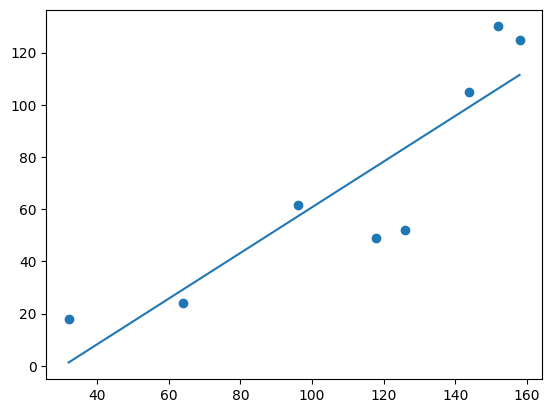

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x, slope * np.array(x) + intercept, '-') #별도의 plot을 지정하지않으면 line plot
plt.show()

In [14]:
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 무시함

boston = load_boston()
x = boston.data
y = boston.target


# 데이터 분할하기
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

#minmax scaler: 최대/최솟값이 각각 1,0 이 되도록 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

#Linear Regression
from sklearn.linear_model import LinearRegression

#회귀분석 학습
model_boston = LinearRegression().fit(x_train_scaler, y_train)
print(model_boston.coef_) #w 벡터값
print(model_boston.intercept_) #bias 값
print(model_boston.score(x_train_scaler, y_train)) # score():결정 계수 r^2 결정 계수는 -1 ~ 1 사이의 값을 가짐


[-11.87445333   3.40184679   1.31383578   3.11983512  -7.4926916
  19.94924862  -1.0507031  -15.24168408   5.58272882  -4.55997081
  -8.56044096   4.67731048 -19.82738646]
26.028229324073685
0.7434997532004697


In [10]:
from sklearn.model_selection import cross_val_score

#cross_val_score(model, x, y, scoring=None, cv=None) #교차검증 함수
r2 = cross_val_score(model_boston, x_train_scaler, y_train, cv = 5)

r2.mean() #결정계수 평균 출력

0.6643728256549879

In [11]:
import math
from sklearn.metrics import mean_squared_error #평균 제곱 오차를 구함

math.sqrt(mean_squared_error(y_train, model_boston.predict(x_train_scaler))) #평균 오차 구함

y_pred = model_boston.predict(x_test_scaler)
y_pred

array([14.25190455, 21.13870009, 17.22690101, 37.42664599, 27.79506957,
       28.07329911, 37.29661743, 33.40581581, 30.91593502, 24.16586289,
       20.48490543, 13.70857478, 20.85574334, 20.63348592, 27.90383929,
       24.57679756, 17.82371208, 34.50610847, 13.34413169, 24.30332091,
       20.91383553, 23.99796568, 21.11089299, 10.25818215, 34.43752584,
       34.35065697, 15.74055574, 34.078616  , 20.12537856, 25.41655925,
       18.12056345, 12.91006802, 26.41880151, 16.64292342, 28.6087615 ,
       22.66007567,  8.52034633, 31.54767761, 10.62241231, 20.00198811,
       17.39504353, 27.69346401, 17.65149162, 30.18582101, 19.89337036,
       29.12019376, 35.55767042, 29.19254624, 19.42012236, 18.37851917,
       21.18427493, 14.85108423, 15.42319019, 35.77597244, 21.17418225,
       23.47598292, 22.23955351, 23.06334637, 18.568162  , 26.37603589,
       20.23517114, 37.25701   , 25.84247437, 16.46179469, 16.47211099,
       23.32812316, 19.49347396, 25.61735872, 13.12806667, 13.06

In [13]:
import math
from sklearn.metrics import mean_squared_error
rmse_test = math.sqrt(mean_squared_error(y_test, y_pred)) #rmse: 루트 평균 제곱 오류

print(rmse_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred)) #결정 계수 구함. 결정계수(r2):상관계수를 제곱한 값

3.926873694595225
0.7787253759905552


## 다중 회귀식의 추정방법
* 동시 입력법
    * 모든 독립변수들을 포함하여 분석하는 방법
    * 이를 통해 특정 독립변수의 영향력을 알 수 있음
    
* 단계적 선택법
    * 다른 변수들이 회귀식에 존재할 때 종속변수에 영향력이 있는 변수들만을 회귀식에 포함시키는 방법
    * 설명력이 높은 즉, 유의 확률 p가 가장 작은 변수의 순으로 회귀식에 포함시킴
    
* 후진 소거법
    * 모든 독립변수를 모두 포함시킨 상태에서 기여도가 적은 변수부터 하나씩 제거하는 방법
    
* 전진 선택법
    * 독립변수가 하나도 포함되지 않은 모델에서 시작해서 f값에 가장 큰 기여를 하는 변수를 순서대로 더하는 방법
    

## 보스턴 직값 데이터를 이용한 다중회귀식 추정
#### statsmodel 사용

In [25]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = Boston.data
boston_df.head() #medv 가 레이블

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
import statsmodels.formula.api as smf

formula = 'medv~' + '+'.join(boston_df.iloc[:,:-1].columns)
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [28]:
#OLS : 가장 기본적인 결정론적 선형 회귀 방법
# 잔차제곱합(RSS)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법

model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary() #요약정보

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          6.72e-135
Time:                        10:20:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
import statsmodels.formula.api as smf
formula = 'medv ~ rad + zn + rm + chas + age -1' # rad + zn + rm + chas + age 칼럼만 포함
model_boston2 = smf.ols(formula=formula, data=boston_df).fit()
model_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   5.05e-289
Time:                        10:20:07   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 다중공선성과 VIF
* 다중공선성이란
    * 회귀분석에서 사용된 모형의 일부 변수가 다른 변수와 상관정도가 높아 데이터 분석시 부정적인 영향을 미치는 현상
    * 다중 공선성이 발생되면, 회귀 모형의 적합성이 떨어지고, 다른 중요한 독립변수가 모형에서 제거 될 가능성이 높다.
    * 결정계수의 값이 과대하게 나타날 수 있거나 설명력은 좋은데 예측력이 떨어질 수 있게 된다.
    * 공선성을 낮추는 방법은 상관관계가 높은 독립변수를 제거하거나 변수 선택방법을 이용해서 분석해야 한다.
    
* 다중공선성 의심 상황
    * data 수에 비해 과다한 독립변수를 사용했을 때
    * 독립변수들의 상관계수가 크게 나타날 때
    * 한 독립변수를 회귀모형에 추가하거나 제거하는 것이 회귀계수의 크기나 부호에 큰 변화를 줄 때

* 다중공선성을 파악하는 방법
    * 산점도 그래프
    * VIF

* VIF(Variance Inflation Factors, 분산 팽창요인)
    * 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정하는 척도
    * VIF가 10이 넘으면 다중공선성이 있다고 판단하며 5가 넘으면 주의할 필요가 있는 것으로 판단한다.
    * 절대적인 기준은 없으므로 적절한 수준에서 판단해야 한다.

## 보스턴 집값 데이터의 VIF 확인

In [38]:
import statsmodels.api as sm
Boston = sm.datasets.get_rdataset('Boston', package='MASS')
boston_df = Boston.data

formula = 'medv~' + '+'.join(boston_df.iloc[:,:-1])
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [39]:
from patsy import dmatrices # 디자인 행렬 수행
y,x = dmatrices(formula, boston_df, return_type='dataframe')

# boston_df에서 formula에서 정의하지 않은 요소는 y(medv컬럼)에
# 정의한 요소는 x(독립변수)에 저장
# dmatrices()를 이용해서 boston_df에서 종속변수와 독립변수를 분리하는 작업 수행

import pandas as pd
vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor # vif 계산 함수
vif['VIF Factor'] = [variance_inflation_factor(x.values, i)
                    for i in range(x.shape[1])]
vif['feature'] = x.columns #x.columns : boston_df의 컬럼 이름 리스트
vif

,VIF Factor,feature
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [40]:
def get_vif(formula, df): 
 from patsy import dmatrices
 y, x = dmatrices(formula, df, return_type="dataframe")
    
 import pandas as pd

 vif = pd.DataFrame()
    
 from statsmodels.stats.outliers_influence import variance_inflation_factor

 vif["VIF Factor"] = [variance_inflation_factor(x.values, i) 
 for i in range(x.shape[1])]
    
 vif["features"] = x.columns

 return vif

formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) + "-1" #-1을 입력하면 칼럼중 intercept를 제거함
print(formula)
get_vif(formula, boston_df)
    

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1


,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [46]:
formula = 'medv~crim+zn+indus+chas+dis+rad+lstat-1'

get_vif(formula, boston_df)

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [47]:
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## 정규화 선형회귀(Ridge, Lasso, Elastic-net)
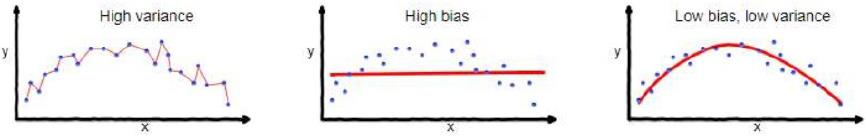
* 정규화 선형회귀는 선형회귀 계수에 대한 제약 조건을 추가함으로써 모델이 과적합하는 현상을 막는 방법이다.
* 과적합이 발생하면 모델의 가중치도 과하게 증가하는 경향이 나타나는데, 이에 착안하여 가중치의 크기를 제한함으로써 과적합을 막을 수 있다.
* 과적합은 학습데이터에 대해서는 완벽하게 예측하지만, 새로운 데이터가 들어왔을때는 예측이 안정적이지 않는것이다.
* 단 정규화의 정도를 강하게 할 경우에는 학습이 잘 되지 않는 과소적합이 발생할 수 있다.
* 일반적으로 Ridge regression, Lasso regression, Elastic-net regression이 사용된다.

#### Bias와 Variance
* 예측값들이 실제 타겟값과 전반적으로 멀리 떨어져 있으면 결과의 편향(bias)가 높다고 말한다.
* 예측값들이 전반적으로 서로 멀리 흩어져 있으면 결과의 분산(variance)가 높다고 말한다.
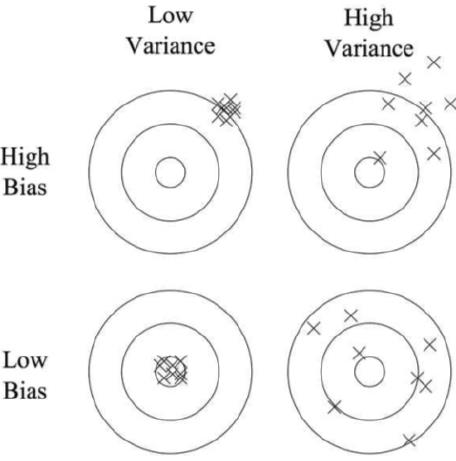

#### trade-off
* 편향과 분산은 한쪽이 증가하면 다른 한쪽이 감소하고, 한쪽이 감소하면 다른 한쪽이 증가하는 trade-off 관계이다.
* 정규화는 분산을 낮춰 과적합을 막는 방법이지만 trade-off 관계로 인해서 분산을 낮추는 대신 편향이 높아질 수 있다.

## 당뇨병 데이터 로드

In [52]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
x_train,x_test, y_train,y_test = train_test_split(data.data, data.target, random_state=42)

# Ridge Regression 모델
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) #하이퍼 파라미터
ridge.fit(x_train,y_train)
print('ridge = ',ridge.score(x_test, y_test))

# Lasso Regression 모델
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0) # 하이퍼 파라미터
lasso.fit(x_train, y_train)
print('lasso = ',lasso.score(x_test, y_test))

#Elastic-net regression 모델
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=1.0, l1_ratio=0) # 하이퍼 파라미터
elastic.fit(x_train, y_train)
print('elastic = ',elastic.score(x_test,y_test))

ridge =  0.4384009113704955
lasso =  0.37914194389255096
elastic =  -0.0044383730131891674


## 1. 릿지회귀(ridge Regression)
* (1) 정의
    * 추정계수의 제곱합을 최소로 하는것.
* (2) 특징
     - 제곱합을 최소화 하기 때문에 계수의 크가 줄어듬 => 과적합이 방지됨

     - 다중공선성이 분산되기 때문에 효과적

     - 딥러닝 loss function에서 L2 panelty로 사용됨
    
## 2. 라쏘회귀(lasso Regression)
* (1) 정의
    * 추정계수의 절댓값 합을 최소로 하는것 (0에 가까워짐)
* (2) 특징
    - 몇몇 기여도가 낮은 계수들이 0으로 수렴하려고 함

    - 반면 기여도가 높은 특정변수의 계수는 커지는 단점이 있음

    - 딥러닝 loss function에서 L1 panelty로 사용됨
    
## 3. 엘라스틱 넷(elastic net)
* (1) 정의
    * 추정계수의 절댓값 합과 제곱합을 동시에 최소로 하는것
* (2) 특징
    - 큰 데이터셋에서 릿지와 라쏘의 효과를 모두 반영하기 좋음 (적은 데이터셋은 효과적음, 릿지 라쏘와 반대)

#### l1-norm은 각 원소들의 절댓값을 더한 것으로 표현합니다.(Lasso 회귀에서 사용)

#### l2-norm은 각 원소들의 제곱의 합을 제곱근 해준 것으로 표현합니다.(Ridge 회귀, 라플라스 근사에서 사용)

In [57]:
# 정규화 선형회귀 모델별 가중치(계수) 비교
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# 선형 모델을 비교하기 위해 생성
linear = LinearRegression()
linear.fit(x_train, y_train)
print('선형회귀 정확도:',linear.score(x_test,y_test),'\n')

# 계수를 한 문에 비교하기 위한 DataFrame
coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index)
print("정규화 선형회귀 모댈별 가중치(계수) 비교")
coefs_df

선형회귀 정확도: 0.48490866359058005 

정규화 선형회귀 모댈별 가중치(계수) 비교


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981
